In [51]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 9

## Grouping by 1 Column

In [52]:
# Create a table of ice cream cones
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [53]:
cones.group('Flavor', list)

Flavor,Color list,Price list
bubblegum,['pink'],[4.75]
chocolate,"['light brown', 'dark brown', 'dark brown']","[4.75, 5.25, 5.25]"
strawberry,"['pink', 'pink']","[3.5499999999999998, 5.25]"


In [54]:
cones.group('Flavor', max)

Flavor,Color max,Price max
bubblegum,pink,4.75
chocolate,light brown,5.25
strawberry,pink,5.25


In [55]:
cones.group('Flavor', np.average)

Flavor,Color average,Price average
bubblegum,,4.75
chocolate,,5.08333
strawberry,,4.4


In [56]:
def spread(values):
    return max(values) - min(values)

In [57]:
spread(make_array(-10, 0, 10))

20

In [58]:
cones.group('Flavor', spread)

Flavor,Color spread,Price spread
bubblegum,,0
chocolate,,0.5
strawberry,,1.7


In [59]:
spread(['apple', 'banana'])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

Another example: from the `top_movies` table, calculate the total gross (adjusted) for movies from each year.

In [60]:
# Load the top_movies table
top_movies = Table.read_table('data/top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [61]:
# Step 1: Use select to focus on the Year and Gross (Adjusted) columns
# Step 2: group by year and aggregate using the average function
avg_gross_by_year = top_movies.select('Year', 'Gross (Adjusted)').group('Year', sum)
avg_gross_by_year

Year,Gross (Adjusted) sum
1921,408214300
1937,969010000
1939,1796176700
1940,599215600
1941,1166071700
1942,566403700
1945,557803900
1946,942521400
1950,536079700
1952,533400000


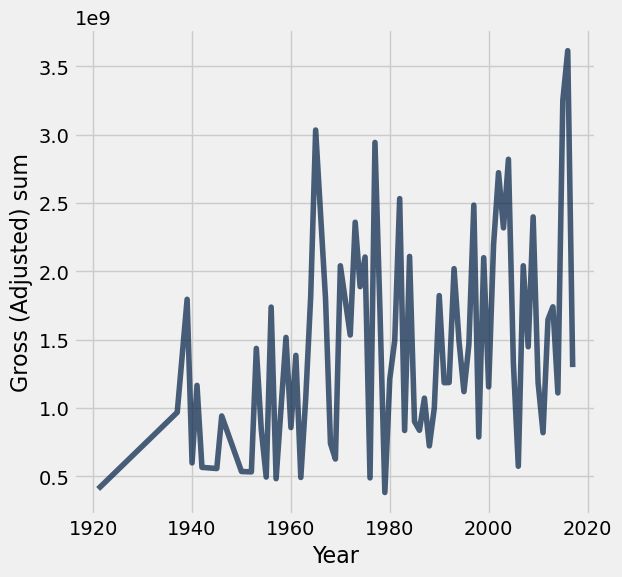

In [62]:
# Just for fun, let's plot the total gross using a line graph
avg_gross_by_year.sort('Year').plot('Year')

Another example: calculate how much the highest-grossing movie from each studio earned.

In [63]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [64]:
# Focus on the Studio and Gross (Adjusted) columns
top_movies_partial = top_movies.select('Studio', 'Gross (Adjusted)')
top_movies_partial

Studio,Gross (Adjusted)
MGM,1796176700
Fox,1583483200
Fox,1266072700
Universal,1261085000
Paramount,1204368000
Paramount,1164590000
Universal,1138620700
MGM,1103564200
Warner Brothers,983226600
Disney,969010000


In [65]:
# What should we fill in here?
top_gross_by_studio = top_movies_partial.group('Studio', max)
top_gross_by_studio

Studio,Gross (Adjusted) max
AVCO,760778000
Buena Vista,961143200
Columbia,632734400
Disney,969010000
Dreamworks,631642700
Fox,1583483200
IFC,368219200
Lionsgate,454409200
MGM,1796176700
Metro,408214300


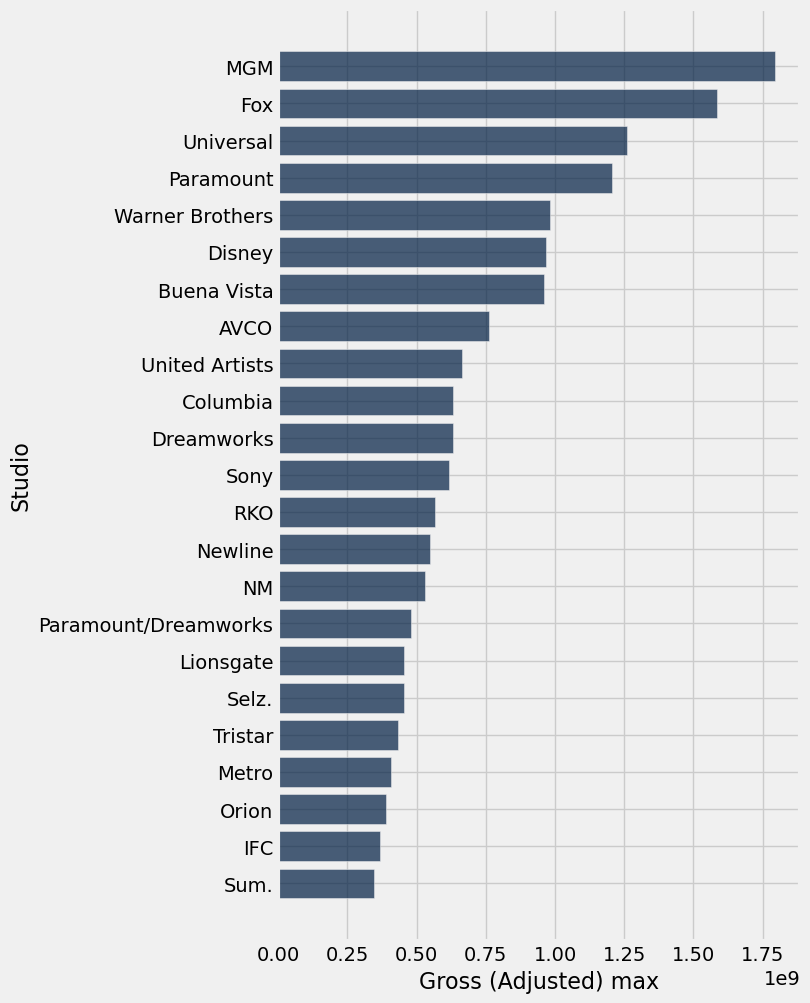

In [66]:
# We can plot these values as well! 
# Since Studio is a categorical variable, use a bar chart
top_gross_by_studio.sort('Gross (Adjusted) max', descending=True).barh('Studio')

## Grouping by Multiple Columns (Cross-Classification)

In [67]:
cones.group(['Flavor', 'Color'], sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


Another example: from the `top_movies` table, calculate the total gross (adjusted) for each studio in each year.

In [68]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [69]:
top_movies.select(['Studio', 'Year', 'Gross (Adjusted)']).group(['Studio', 'Year'], sum)

Studio,Year,Gross (Adjusted) sum
AVCO,1967,760778000
Buena Vista,1987,370746600
Buena Vista,1988,338409100
Buena Vista,1990,374948400
Buena Vista,1991,403283400
Buena Vista,1992,466212500
Buena Vista,1994,792511700
Buena Vista,1995,389989400
Buena Vista,1998,382096000
Buena Vista,1999,937145100


**Discussion Question 1:** create a table that shows the height of the tallest building in each city for each material.

In [70]:
# Load table of skyscrapers
sky = Table.read_table('data/skyscrapers_v2.csv')

# Replace year completed column with age column
sky = sky.with_column('age', 2023 - sky.column('completed')).drop('completed')
sky

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,9
Willis Tower,steel,Chicago,442.14,49
432 Park Avenue,concrete,New York City,425.5,8
Trump International Hotel & Tower,concrete,Chicago,423.22,14
Empire State Building,steel,New York City,381,92
Bank of America Tower,mixed/composite,New York City,365.8,14
Stratosphere Tower,concrete,Las Vegas,350.22,27
Aon Center,steel,Chicago,346.26,50
John Hancock Center,steel,Chicago,343.69,54
Chrysler Building,steel,New York City,318.9,93


In [72]:
# What are the two variables that we need to group by?
# What function should we use to aggregate?
sky.select(['material', 'city', 'height']).group(['material', 'city'], max)

material,city,height max
concrete,Atlanta,264.25
concrete,Austin,208.15
concrete,Baltimore,161.24
concrete,Boston,121.92
concrete,Charlotte,265.48
concrete,Chicago,423.22
concrete,Cincinnati,125
concrete,Cleveland,125
concrete,Columbus,79.25
concrete,Dallas,176.48


## Grouping by 2 Columns: Pivot Tables

The following two tables contain the same information, but in different formats:

In [73]:
cones.group(['Flavor', 'Color'], sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


In [74]:
cones.pivot('Flavor', 'Color', 'Price', sum)

Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


What if we reverse the order of the first two arguments?

In [75]:
cones.pivot('Color', 'Flavor', 'Price', sum)

Flavor,dark brown,light brown,pink
bubblegum,0,0,4.75
chocolate,10.5,4.75,0
strawberry,0,0,8.8


Another example: from the `top_movies` table, calculate the total gross (adjusted) for each studio in each year---using a pivot table!

In [76]:
top_movies.pivot('Studio', 'Year', 'Gross (Adjusted)', sum)

Year,AVCO,Buena Vista,Columbia,Disney,Dreamworks,Fox,IFC,Lionsgate,MGM,Metro,NM,Newline,Orion,Paramount,Paramount/Dreamworks,RKO,Selz.,Sony,Sum.,Tristar,United Artists,Universal,Warner Brothers
1921,0,0,0,0,0,0,0,0,0,408214300,0,0,0,0,0,0,0,0,0,0,0,0,0
1937,0,0,0,969010000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1939,0,0,0,0,0,0,0,0,1796176700,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1940,0,0,0,599215600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1941,0,0,0,738256500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,427815200
1942,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,566403700,0,0,0,0,0,0,0
1945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,557803900,0,0,0,0,0,0,0
1946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,488950000,453571400,0,0,0,0,0,0
1950,0,0,0,536079700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1952,0,0,0,0,0,0,0,0,0,0,0,0,0,533400000,0,0,0,0,0,0,0,0,0


Yet another example: remember the census dataset? We can use a pivot table to get the total population for males and females in each age group.

In [77]:
# Download and import the table of census data
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv' 
full_census_table = Table.read_table(data)
full_census_table

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


In [78]:
census_pivot = full_census_table.pivot('SEX', 'AGE', 'POPESTIMATE2019', sum)

# Relabel columns based on the census sex codes
census_pivot.relabel('0', 'Total')
census_pivot.relabel('1', 'MALE')
census_pivot.relabel('2', 'FEMALE')

AGE,Total,MALE,FEMALE
0,3783052,1935117,1847935
1,3829599,1958585,1871014
2,3922044,2005544,1916500
3,3998665,2043010,1955655
4,4043323,2066951,1976372
5,4028281,2061200,1967081
6,4017227,2052956,1964271
7,4022319,2055735,1966584
8,4066194,2079723,1986471
9,4061874,2073148,1988726


**Discussion Question 2:** create a table containing the height difference between the tallest steel building and the tallest concrete building in each city.

*Hint:* you can solve this by creating a pivot table and then performing some extra steps.

In [79]:
sky

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,9
Willis Tower,steel,Chicago,442.14,49
432 Park Avenue,concrete,New York City,425.5,8
Trump International Hotel & Tower,concrete,Chicago,423.22,14
Empire State Building,steel,New York City,381,92
Bank of America Tower,mixed/composite,New York City,365.8,14
Stratosphere Tower,concrete,Las Vegas,350.22,27
Aon Center,steel,Chicago,346.26,50
John Hancock Center,steel,Chicago,343.69,54
Chrysler Building,steel,New York City,318.9,93


In [84]:
# Step 1: create a pivot table
# What variables do we want for columns? rows?
city_and_material_heights = sky.pivot('material', 'city', 'height', max).drop('mixed/composite')

# Step 2: what do we do to the pivot table to get a column of height differences?
diffs = city_and_material_heights.column('steel') - city_and_material_heights.column('concrete')
city_and_material_heights = city_and_material_heights.with_column('Height Diff', diffs)
city_and_material_heights

city,concrete,steel,Height Diff
Atlanta,264.25,169.47,-94.78
Austin,208.15,93.6,-114.55
Baltimore,161.24,155.15,-6.09001
Boston,121.92,240.79,118.87
Charlotte,265.48,179.23,-86.25
Chicago,423.22,442.14,18.92
Cincinnati,125,175,50
Cleveland,125,215.8,90.8
Columbus,79.25,169.3,90.05
Dallas,176.48,270.06,93.58


## Joins ##

Once again, here is the table of ice cream cones:

In [85]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


Suppose that different flavors of ice cream have different ratings, summarized in the following table:

In [86]:
ratings = Table().with_columns(
    'Kind', make_array('strawberry', 'chocolate', 'bubblegum'),
    'Stars', make_array(2.5, 3.5, 4)
)
ratings

Kind,Stars
strawberry,2.5
chocolate,3.5
bubblegum,4


We can add ratings information to the cones table using `join`:

In [87]:
# Join the cones and ratings table
# Match rows in cones to rows in ratings by comparing the values of "Flavor" to the values of "Kind"
cones.join('Flavor', ratings, 'Kind')

Flavor,Color,Price,Stars
bubblegum,pink,4.75,4
chocolate,light brown,4.75,3.5
chocolate,dark brown,5.25,3.5
chocolate,dark brown,5.25,3.5
strawberry,pink,3.55,2.5
strawberry,pink,5.25,2.5


Here's another example. Suppose we have a table of power plants, containing the amount of energy they produced in a day (in Megawatt-hours), as well as their fuel type:

In [88]:
power_plants = Table(['Fuel', 'Energy (MWh)'])
power_plants = power_plants.with_rows([
    ['Coal', 100 * 24],
    ['Natural Gas', 150 * 24],
    ['Coal', 500 * 24],
    ['Solar', 50 * 24],
    ['Wind', 50 * 24],
    ['Natural Gas', 300 * 24],
    ['Natural Gas', 300 * 24],
    ['Solar', 100 * 24],
    ['Solar', 120 * 24]
])
power_plants

Fuel,Energy (MWh)
Coal,2400
Natural Gas,3600
Coal,12000
Solar,1200
Wind,1200
Natural Gas,7200
Natural Gas,7200
Solar,2400
Solar,2880


We also have a table of CO2 emissions per MWh:

In [89]:
emissions = Table(['Fuel Type', 'CO2 Emissions (lbs / MWh)'])
emissions = emissions.with_rows([
    ['Coal', 2.26 * 10 ** 3],
    ['Natural Gas', 0.97 * 10 ** 3],
    ['Solar', 0],
    ['Wind', 0],
    ['Petroleum', 2.44 * 10 ** 3]
])
emissions

Fuel Type,CO2 Emissions (lbs / MWh)
Coal,2260
Natural Gas,970
Solar,0
Wind,0
Petroleum,2440


What are the total CO2 emissions of these power plants in a day? We can answer this by joining the two tables:

In [90]:
combined = power_plants.join('Fuel', emissions, 'Fuel Type')
combined

Fuel,Energy (MWh),CO2 Emissions (lbs / MWh)
Coal,2400,2260
Coal,12000,2260
Natural Gas,3600,970
Natural Gas,7200,970
Natural Gas,7200,970
Solar,1200,0
Solar,2400,0
Solar,2880,0
Wind,1200,0


In [91]:
# Add a column containing the total emissions of each power plant per day
combined = combined.with_column(
    'Total Emissions (tons)',
    combined.column('Energy (MWh)') * combined.column('CO2 Emissions (lbs / MWh)') / 2000)
combined

Fuel,Energy (MWh),CO2 Emissions (lbs / MWh),Total Emissions (tons)
Coal,2400,2260,2712
Coal,12000,2260,13560
Natural Gas,3600,970,1746
Natural Gas,7200,970,3492
Natural Gas,7200,970,3492
Solar,1200,0,0
Solar,2400,0,0
Solar,2880,0,0
Wind,1200,0,0


In [92]:
# Calculate the total emissions (in tons)
sum(combined.column('Total Emissions (tons)'))

25002.0

Let's look at another example. Below are two tables: a table of drinks, and a table of discounts at various cafes.

In [93]:
# CREATE A TABLE OF DRINKS

# Create a table with column headings but no rows
drinks = Table(['Drink', 'Cafe', 'Price']) 

# Add rows to the table
drinks = drinks.with_rows([
    ['Milk Tea', 'Asha', 5.50],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [94]:
# CREATE A TABLE OF DISCOUNTS
discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'FSM')
)
discounts

Coupon % off,Location
10,Asha
25,Strada
5,FSM


**Discussion Question 3:** add a column called `Discounted Price` to the `drinks` table, which contains the price of each drink after applying a coupon. 

*Hint:* you can solve this using `join` and then some additional steps.

In [99]:
# Step 1: what two tables do we want to join, and based on what columns?
joined_table = drinks.join('Cafe', discounts, 'Location')

# Step 2: how do we calculate discounted prices from the joined table?
discounted_array = joined_table.column('Price') * (1 - 0.01 * joined_table.column('Coupon % off'))
joined_table = joined_table.with_column('Discounted Price', discounted_array)
joined_table

Cafe,Drink,Price,Coupon % off,Discounted Price
Asha,Milk Tea,5.5,10,4.95
FSM,Espresso,2,5,1.9
Strada,Espresso,1.75,25,1.3125
Strada,Latte,3.25,25,2.4375


## Example: Revisiting the Class Data Survey

In [ ]:
# Load part of the class data survey
class_data = Table.read_table('data/cmpsc5a-classdata-w23.csv')
class_data = class_data.select('Platform', 'Hours of Media', 'Insta Follows', 'Social Media Accounts')
class_data

Remember that every question was optional! If a respondent did not answer a particular question, there response is recorded as `nan`.

Let's find out if there is an association between favorite social media platform (`Platform`) and related social media statistics (`Social Media Accounts`, `Insta Follows`, and `Hours of Media`). We will group by `Platform`, and then try to calculate the average of these values using `np.nanmean`, which will calculate the average while ignoring all values `nan`:

In [ ]:
class_data.group('Platform', np.nanmean)

Uh oh! Several platform names appear to be repeated, since they are formatted slightly differently. As we saw last week, a good first step to "clean up" these platform names is to make all characters lower (or upper) case, and to remove spaces. We can accomplish this by `apply`ing our own cleaning function.

In [ ]:
def clean_platform(name):
    """
    Force all characters to be lower case, and remove spaces.
    """
    return name.replace(' ', '').lower()

In [ ]:
clean_platform('Tik Tok')

In [ ]:
clean_platform('TikTok')

In [ ]:
# Apply the clean_platform function to the class data table
# Add these "cleaned" platform names as a new column
class_data = class_data.with_column(
    'Platform (Clean)',
    class_data.apply(clean_platform, 'Platform'))

Let's try this again---now grouping by `"Platform (Clean)"` instead of `"Platform"`.

In [ ]:
class_data.group('Platform (Clean)', np.nanmean).show()

Still not quite there! The values `ins` and `instagram` refer to the same platform, as well as `tw` and `twitter`. How can we handle these special cases?

First, we will create a table called `platform_codes`. One column in this table will contain all the possible values for `Platform (Clean)`, e.g. `ins`, and the other table will contain the value we want to replace these platform names with, like `instagram`.

In [ ]:
# Create a table with two columns called Name and Platform (Cleaner)
# that contains no rows
empty_table = Table(make_array('Name', 'Platform (Cleaner)'))

# Add a row for each value that Platform (Clean) can be
platform_codes = empty_table.with_rows([
    ['discord', 'discord'],
    ['ins', 'instagram'],
    ['instagram', 'instagram'],
    ['nan', 'none'],
    ['pinterest', 'pinterest'],
    ['snapchat', 'snapchat'],
    ['tiktok', 'tiktok'],
    ['tumblr', 'tumblr'],
    ['tw', 'twitter'],
    ['twitter', 'twitter'],
    ['wechat', 'wechat'],
    ['youtube', 'youtube']])
    

platform_codes.show()

Now we use `join` to look up the even cleaner platform name for each row in the class data table:

In [ ]:
class_data = class_data.join('Platform (Clean)', platform_codes, 'Name')
class_data
# Note the last column Platform (Cleaner) is new

And we will try group one more time:

In [ ]:
stats_by_platform = class_data.group('Platform (Cleaner)', np.nanmean)
stats_by_platform.show()

Much better! Let's create some bar charts:

In [ ]:
# Create a table focusing on hours of social media use
# sorted in descending order
hours_by_platform = stats_by_platform.select('Platform (Cleaner)', 'Hours of Media nanmean')
hours_by_platform = hours_by_platform.sort('Hours of Media nanmean', descending=True)

# Relabel the column names to something easier to read
hours_by_platform.relabel('Platform (Cleaner)', 'Favorite Platform')
hours_by_platform.relabel('Hours of Media nanmean', 'Weekly Hours of Social Media Use (average)')

# Create a bar chart
hours_by_platform.barh('Favorite Platform')

In [ ]:
# Create a table focusing on number of instagram accounts followed
# sorted in descending order
insta_follows_by_platform = stats_by_platform.select('Platform (Cleaner)', 'Insta Follows nanmean')
insta_follows_by_platform = insta_follows_by_platform.sort('Insta Follows nanmean', descending=True)

# Relabel the column names to something easier to read
insta_follows_by_platform.relabel('Platform (Cleaner)', 'Favorite Platform')
insta_follows_by_platform.relabel('Insta Follows nanmean', '# Instagram Accounts Followed (average)')

# Create a bar chart
insta_follows_by_platform.barh('Favorite Platform')